In [1]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
data=np.load('./output_compiled.npy')

In [5]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.array([0.0])  # 1
lambda_std = np.array([0.2])  # 1
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.0,1.0,6)  # 6
num_rep = 100  # number of repeats 100
# epsilon=np.array([0.0]) # no penalty for now.
# # should give 12000 repeats. Run with 600 job array.
# # should take around 4 hours (240min).
x=1-2*beta
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 14, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0, 'epsilon':0.0}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]

In [6]:
def jiseon_model_2(l, beta, sigma_l, alpha):
    num = beta*np.log(2-2*alpha+alpha/beta)**2+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))**2
    denom = beta*np.log(2-2*alpha+alpha/beta)+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))
    return l*(1+sigma_l**2/l**2*(-1+0.5*num/denom))

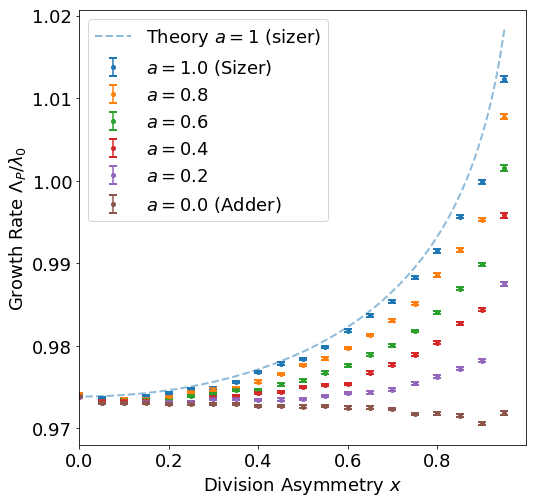

In [7]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
i0=0
i1=0
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
# for ind in range(0,11,2):
for ind in range(len(alpha)):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    lab=r'$ a={0}$'.format(1-alpha[ind])
    if ind==0:
        lab+=' (Sizer)'
    if ind==len(alpha)-1:
        lab+=' (Adder)'
    p=plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=lab,linestyle='None',marker='.',markersize=8,capsize=4,capthick=2)
xv=np.linspace(x[ind_beta_start],x[-1],100)
yv=jiseon_model_2(1.0,0.5*(1-xv),lambda_std[i1],1.0)
plt.gca().set_prop_cycle(None)
plt.plot(xv,yv,label=r'Theory $a=1$ (sizer)',linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
# plt.legend()
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/Fig_1D.eps',dpi=300,bbox_inches='tight')